In [5]:
import pandas as pd
import numpy as np
import time
import datetime 
import calendar
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 53000
%matplotlib inline

In [6]:
data = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/master-data-science/data/Eixample/notebook-serie-Eix_NOX-19', parse_dates= ['DATA'], index_col='DATA',header=0)

In [7]:
TEST_SIZE = 310

In [8]:
train, test = data[:-TEST_SIZE], data[-TEST_SIZE:]

In [9]:
train_1 = train.values
test_1 = test.values

In [10]:
x = np.arange(1094)
x = np.reshape(x, (1094,1))

In [11]:
x_train = x[:-TEST_SIZE]

In [12]:
x_test = x[-TEST_SIZE:]

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree_model = DecisionTreeRegressor()

In [15]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
y_pred_tree = tree_model.predict(x_test.reshape(-1,1))

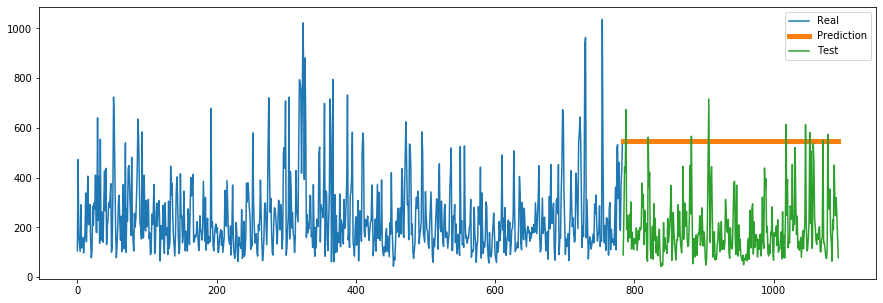

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction', linewidth =5)
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label = 'Test')
ax.legend()

In [18]:
tree_model = DecisionTreeRegressor(max_depth=7)

In [19]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
y_pred_tree = tree_model.predict(x_train.reshape(-1,1))

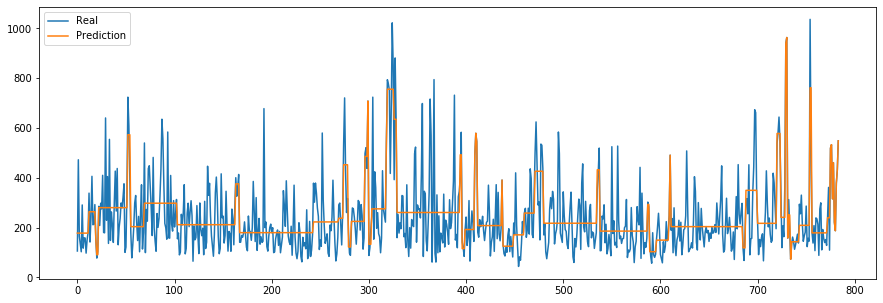

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_train.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

In [22]:
from sklearn import ensemble

In [23]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test.reshape(-1,1))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


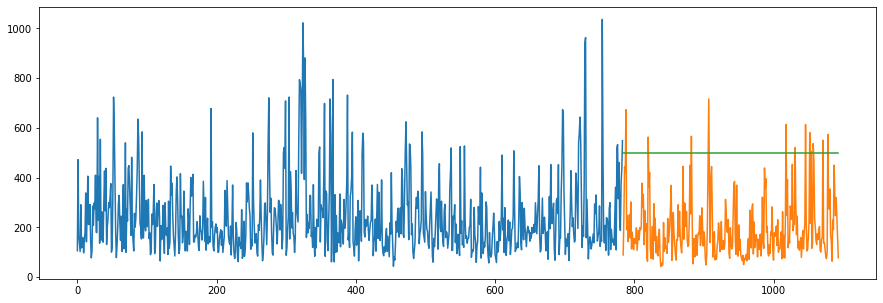

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')

In [25]:
x_train.reshape(-1,1).shape

(784, 1)

In [26]:
x_test.reshape(-1,1).shape

(310, 1)

In [28]:
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(49)) * 16).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(31)) * 10).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


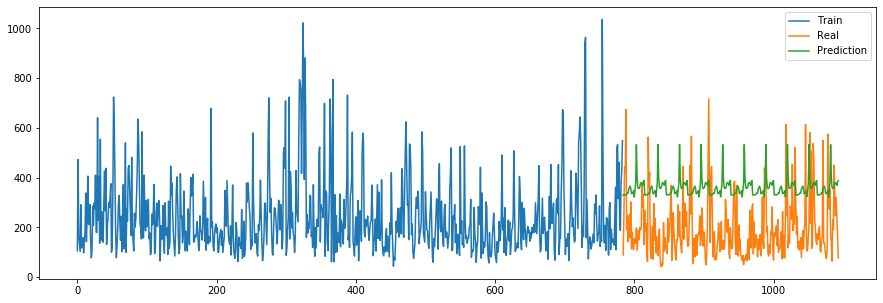

In [29]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

In [30]:
x_train_month_year = np.hstack((x_train_month, np.repeat(list(range(49)), 16).reshape(-1,1)))
x_test_month_year = np.hstack((x_test_month, np.repeat(list(range(1,32)), 10).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


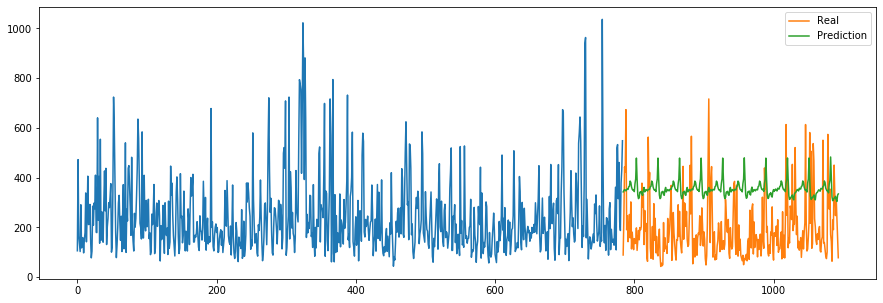

In [31]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month_year)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

In [32]:
from xgboost import XGBRegressor, plot_tree, plot_importance

In [33]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)

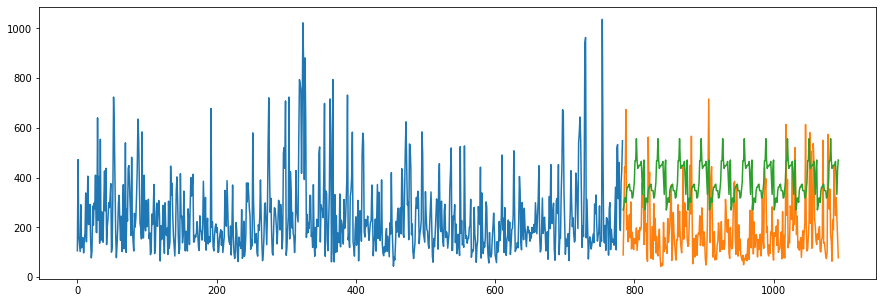

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

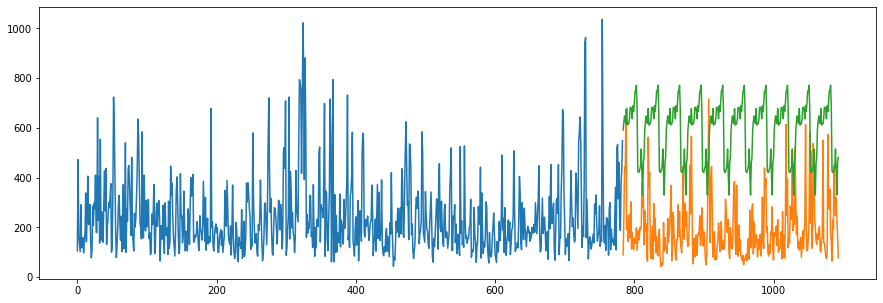

In [37]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=.9)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)



fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

In [38]:
x_train_month_year_2ylag = np.hstack(((train_1.reshape(-1,1)[24:] / train_1.reshape(-1,1)[:-24])[:-24],
                                      (train_1.reshape(-1,1)[24:] - train_1.reshape(-1,1)[:-24])[:-24],
                                      x_train_month_year[48:,:]))

In [39]:
x_test_month_year_2ylag = np.hstack(((train_1[100:].reshape(-1,1) / train_1[:-100].reshape(-1,1))[:310],
                                     (train_1[100:].reshape(-1,1) - train_1[:-100].reshape(-1,1))[:310],
                                     x_test_month_year))

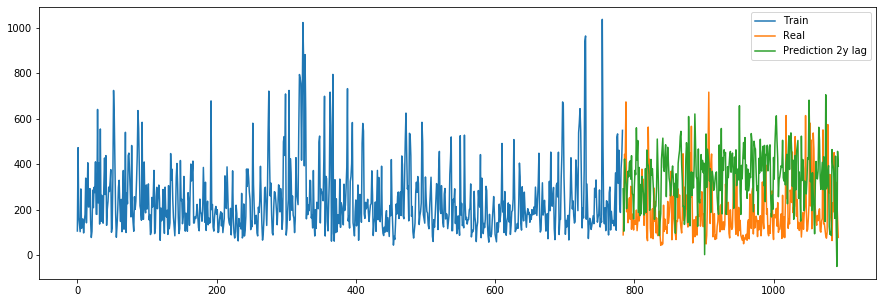

In [60]:
xgb_model = XGBRegressor(n_estimators=400, max_depth=3, learning_rate= 1.1)
xgb_model.fit(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:])
y_pred_xgb_2ylag = xgb_model.predict(x_test_month_year_2ylag)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.legend()

In [62]:
print(xgb_model.score(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:]))

0.9999799763246684


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1,1), train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred_lr = lr_model.predict(x_test.reshape(-1,1))

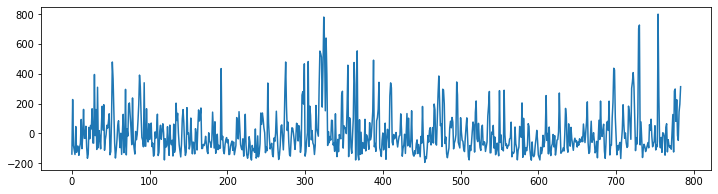

In [67]:
train_log_trend = (train_1.reshape(-1,1) - lr_model.predict(x_train.reshape(-1, 1))).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [96]:
xgb_model = XGBRegressor(n_estimators=400, max_depth=2, learning_rate=1)
xgb_model.fit(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])
y_pred_xgb_2ylag_wotrend = xgb_model.predict(x_test_month_year_2ylag)

In [97]:
xgb_model.score(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])

0.9882081512669365

In [98]:
y_pred_xgb_2ylag_desc = (y_pred_xgb_2ylag_wotrend + lr_model.predict(x_test.reshape(-1, 1)).squeeze())

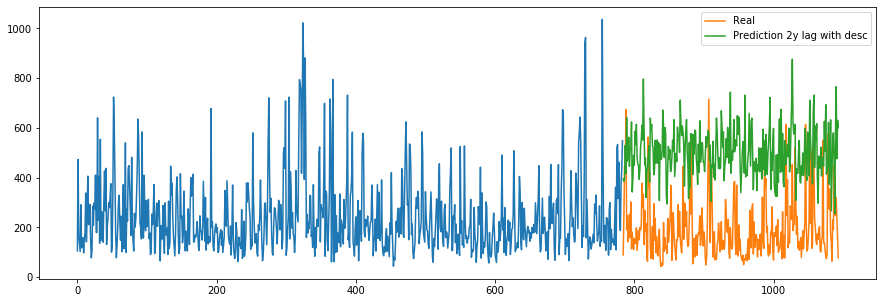

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')

#ax.plot(x_test, forecast_daily, linewidth='3', linestyle='--', markersize= 0.2, marker='o')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction seasonality')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label='wotrend')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_desc, label='Prediction 2y lag with desc')
ax.legend()

In [100]:
xgb_model.score(x_test_month_year_2ylag, y_pred_xgb_2ylag_desc)

-4.661426362312406